# 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。


・virgicolorとvirginica

・sepal_lengthとpetal_length

《実際の問題では？》


実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。また、Week3で利用した散布図行列を使い可視化することも可能です。



In [501]:
# データセット読み込み

from sklearn.datasets import load_iris
import pandas as pd

RAW = load_iris()
#print(data)

X = pd.DataFrame(data=RAW["data"], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print(X)

y = pd.DataFrame(data=RAW["target"], columns=['Species'])
print(y)

origin = X.join(y)
print(origin)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
     Species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]
     sepal_length  sepal_width  petal_length  petal_width  Species
0             5.1          3.5   

In [502]:
# sepal_lengthとpetal_lengthとSpeciesだけのdf

df = origin.iloc[50:,[0,2,4]]
print(df)

     sepal_length  petal_length  Species
50            7.0           4.7        1
51            6.4           4.5        1
52            6.9           4.9        1
53            5.5           4.0        1
54            6.5           4.6        1
..            ...           ...      ...
145           6.7           5.2        2
146           6.3           5.0        2
147           6.5           5.2        2
148           6.2           5.4        2
149           5.9           5.1        2

[100 rows x 3 columns]


# 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。


・ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。


《実際の問題では？》


このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。


今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。



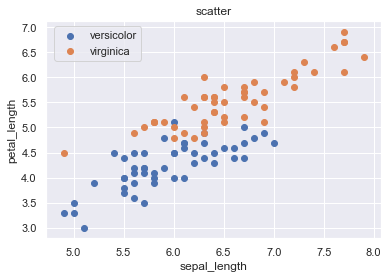

In [503]:
# 散布図

import matplotlib.pyplot as plt
%matplotlib inline

versicolor = df[df['Species'].isin([1])]
virginica = df[df['Species'].isin([2])]

plt.title("scatter")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
x = versicolor["sepal_length"]
y = versicolor["petal_length"]
x2 = virginica["sepal_length"]
y2 = virginica["petal_length"]

plt.scatter(x, y, label="versicolor")
plt.scatter(x2, y2, label="virginica")
plt.legend(bbox_to_anchor=(0.3, 1))

plt.show()


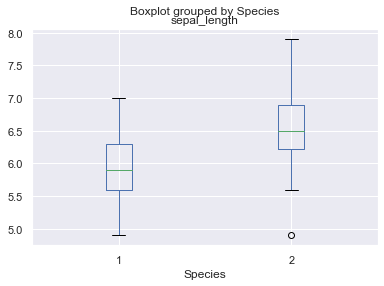

In [504]:
# 箱ひげ図

df.boxplot(column=['sepal_length'], by='Species' )
plt.show()

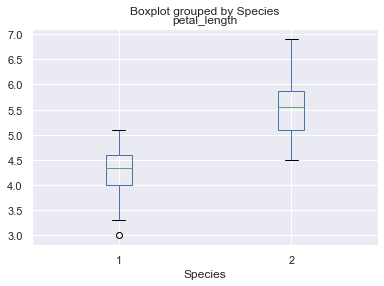

In [505]:
df.boxplot(column=['petal_length'], by='Species' )
plt.show()

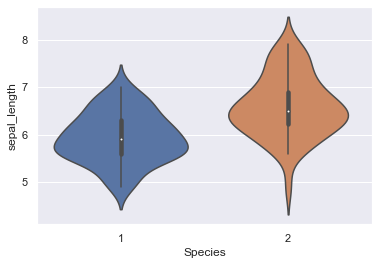

In [506]:
# バイオリン図

import seaborn

seaborn.violinplot( x=df['Species'], y=df['sepal_length'] )
plt.show()

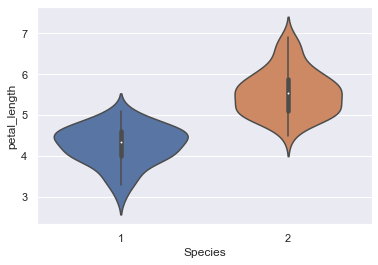

In [507]:
seaborn.violinplot( x=df['Species'], y=df['petal_length'] )
plt.show()

# 【問題3】前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。


scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。


[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


《注意点》


データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。


《分割する理由》


分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。

In [508]:
# ndarray化

import numpy as np

X = df.values
y = X[:,2]
X = np.delete(X, 2, axis=1)

#print(X)
#print(y)

In [509]:
# データ分割
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( X, y, train_size=0.75)
#print(x_train, x_test, y_train, y_test)

# 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。


標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。


[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)


《注意点》


標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。


《実際の問題での前処理は？》


アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。

In [510]:
# 標準化

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
print(x_train_std)
print(x_test_std)


[[ 0.2240365  -0.5142782 ]
 [-1.02061071 -1.03375112]
 [ 0.0684556   0.91427235]
 [ 0.8463601  -0.1246735 ]
 [ 0.6907792   0.39479942]
 [ 2.24658821  1.56361351]
 [ 0.2240365  -0.77401466]
 [-0.70944891  0.26493119]
 [-0.55386801 -0.1246735 ]
 [-1.33177252 -0.5142782 ]
 [-0.86502981 -0.90388289]
 [ 1.46868371  1.17400881]
 [-1.95409612 -1.81296051]
 [-0.24270621  0.91427235]
 [ 0.8463601   0.78440412]
 [-0.39828711 -1.16361935]
 [-0.70944891 -1.16361935]
 [-0.39828711  0.26493119]
 [ 1.31310281  1.30387704]
 [ 0.6907792   0.13506296]
 [ 0.5351983  -0.64414643]
 [-2.10967702 -2.07269698]
 [ 0.2240365   0.52466766]
 [-0.0871253  -0.5142782 ]
 [-0.39828711 -0.5142782 ]
 [-0.39828711 -0.1246735 ]
 [-1.02061071 -1.68309228]
 [-0.0871253  -0.77401466]
 [-0.24270621 -1.16361935]
 [-0.70944891  0.26493119]
 [ 0.6907792   1.04414058]
 [ 0.5351983  -0.38440997]
 [ 2.24658821  2.3428229 ]
 [ 0.3796174   0.78440412]
 [ 0.2240365   0.91427235]
 [ 1.46868371  1.56361351]
 [ 1.001941    1.04414058]
 

# 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。


[sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)


学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。


パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。



In [511]:
# 最近傍法で学習

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_std, y_train)

y_pred = knn.predict(x_test_std)
print("5-nnの場合の正解率：{}".format(metrics.accuracy_score(y_test, y_pred)))

5-nnの場合の正解率：0.92


In [512]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(x_train_std, y_train)

y_pred_1 = knn_1.predict(x_test_std)
print("1-nnの場合の正解率：{}".format(metrics.accuracy_score(y_test, y_pred_1)))

1-nnの場合の正解率：0.84


In [513]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(x_train_std, y_train)

y_pred_3 = knn_3.predict(x_test_std)
print("3-nnの場合の正解率：{}".format(metrics.accuracy_score(y_test, y_pred_3)))

3-nnの場合の正解率：0.92


In [514]:
knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_8.fit(x_train_std, y_train)

y_pred_8= knn_8.predict(x_test_std)
print("8-nnの場合の正解率：{}".format(metrics.accuracy_score(y_test, y_pred_8)))

8-nnの場合の正解率：0.84


# 【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。


2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。


scikit-learnを使い4種類の指標を計算する
混同行列をscikit-learnを使い表示する
4種類の指標値の意味について簡単に調査して文章でまとめる


In [515]:
# Accuracy正解率はやったので、Precision適合率から。

from sklearn.metrics import precision_score

print("５-nnの場合の適合率：{}".format(metrics.precision_score(y_test, y_pred)))

５-nnの場合の適合率：0.8333333333333334


In [516]:
# Recall再現率
from sklearn.metrics import recall_score

print("５-nnの場合の再現率：{}".format(metrics.recall_score(y_test, y_pred)))

５-nnの場合の再現率：1.0


In [517]:
# F値

from sklearn.metrics import f1_score

print("５-nnの場合のF値：{}".format(metrics.f1_score(y_test, y_pred)))

５-nnの場合のF値：0.9090909090909091


In [518]:
# 混合行列

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=[2, 1])
print(cm)

tn, fp, fn, tp = cm.flatten()

print(tn, fp, fn, tp)

[[13  2]
 [ 0 10]]
13 2 0 10


・真陽性（TP: True Positive）: 実際のクラスが陽性で予測も陽性（正解）

・真陰性（TN: True Negative）: 実際のクラスが陰性で予測も陰性（正解）

・偽陽性（FP: False Positive）: 実際のクラスは陰性で予測が陽性（不正解）

・偽陰性（FN: False Negative）: 実際のクラスは陽性で予測が陰性（不正解）

これを行列にしたものが混同行列。

            Negative  Positive
            
Negative     TN        FP

Positive      FN        TP

陰性と陽性は自分で設定できる。
confusion_matrixのlabels=[1, 2]がそう。

In [519]:
# Accuracyを自分で計算してみる
ac = (tp + tn) / (tn + fp + fn +tp) # 全サンプルのうちの正解の割合
print(ac)
print("5-nnの場合の正解率：{}".format(metrics.accuracy_score(y_test, y_pred)))

0.92
5-nnの場合の正解率：0.92


正解率（accuracy）は、すべてのサンプルのうち正解したサンプルの割合。

In [520]:
# precision適合率を自分で計算してみる
pr = tp / (tp + fp) # 陽性判定のうちの正解割合 
print(pr)
print("５-nnの場合の適合率：{}".format(metrics.precision_score(y_test, y_pred)))

0.8333333333333334
５-nnの場合の適合率：0.8333333333333334


適合率（precision）は、陽性と予測されたサンプルのうち正解したサンプルの割合。PPV（positive predictive value）とも呼ばれる。

In [521]:
# Recallを自分で計算してみる
rc = tp / (tp +fn) # 本当は陽性のサンプルのうちの正解割合
print(rc)
print("５-nnの場合の再現率：{}".format(metrics.recall_score(y_test, y_pred)))

1.0
５-nnの場合の再現率：1.0


再現率（recall）は実際に陽性のサンプルのうち正解したサンプルの割合。sensitivityやhit rate, TPR（true positive rate, 真陽性率）などとも呼ばれる。

FN（偽陰性）が大きくなると再現率は小さくなる。偽陰性を避けたい（抑えたい）場合に指標として用いる。

In [522]:
# 試しにfn大きくしてみる
fn_test = 15
rc_test = tp / (tp + fn_test) 
print(rc_test)

# 再現率が小さくなることを確認した

0.4


In [523]:
# F値を自分で計算してみる
f1 = (2*tp) / (2*tp + fp + fn ) #= (2*pr*rc) / (pr + rc)

print(f1)
print("５-nnの場合のF値：{}".format(metrics.f1_score(y_test, y_pred)))

0.9090909090909091
５-nnの場合のF値：0.9090909090909091


F1値（F1-measure）は適合率と再現率の調和平均。 単純にF値（F-measure, F-score）と呼ばれることもある。

# 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [524]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region on 3-nn', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスタンスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

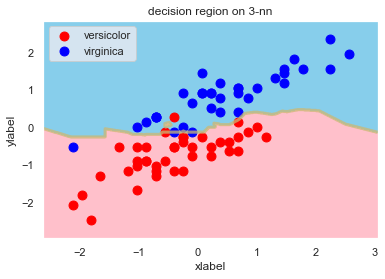

In [525]:
decision_region(x_train_std, y_train, knn_3)

# 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。


・最近傍法

・ロジスティック回帰

・SVM

・決定木

・ランダムフォレスト

In [537]:
# 最近傍法

outlist = {}

def output(y, model, label,outlist={}):
    cm = confusion_matrix(y, model)
    ac = metrics.accuracy_score(y, model)
    pr = metrics.precision_score(y, model)
    rc = metrics.recall_score(y, model)
    f1 = metrics.f1_score(y, model)

    print('confusion matrix = \n', cm)
    print('accuracy = ', ac)
    print('precision = ', pr)
    print('recall = ', rc)
    print('f1 score = ', f1)

    outlist[label] = [cm, ac, pr, rc, f1]
    return outlist

output(y_test, y_pred_lr, "KNN")

confusion matrix = 
 [[10  0]
 [ 1 14]]
accuracy =  0.96
precision =  0.9090909090909091
recall =  1.0
f1 score =  0.9523809523809523


{'KNN': [array([[10,  0],
         [ 1, 14]]), 0.96, 0.9090909090909091, 1.0, 0.9523809523809523]}

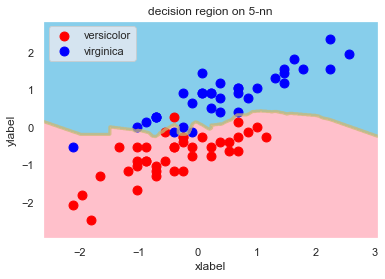

In [538]:
decision_region(x_train_std, y_train, knn, step=0.01, title='decision region on 5-nn')

In [539]:
# ロジスティック回帰

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', solver='liblinear').fit(x_train_std,y_train)

y_pred_lr = lr.predict(x_test_std)


output(y_test, y_pred_lr, "LR")

confusion matrix = 
 [[10  0]
 [ 1 14]]
accuracy =  0.96
precision =  0.9090909090909091
recall =  1.0
f1 score =  0.9523809523809523


{'KNN': [array([[10,  0],
         [ 1, 14]]), 0.96, 0.9090909090909091, 1.0, 0.9523809523809523],
 'LR': [array([[10,  0],
         [ 1, 14]]), 0.96, 0.9090909090909091, 1.0, 0.9523809523809523]}

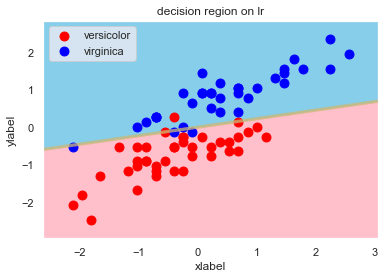

In [540]:
decision_region(x_train_std, y_train, lr, step=0.01, title='decision region on lr')

In [541]:
# SVM
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=None)
svm.fit(x_train_std, y_train)

svm_pred = svm.predict(x_test_std)

output(y_test, svm_pred, "SVM")

confusion matrix = 
 [[10  0]
 [ 2 13]]
accuracy =  0.92
precision =  0.8333333333333334
recall =  1.0
f1 score =  0.9090909090909091


{'KNN': [array([[10,  0],
         [ 1, 14]]), 0.96, 0.9090909090909091, 1.0, 0.9523809523809523],
 'LR': [array([[10,  0],
         [ 1, 14]]), 0.96, 0.9090909090909091, 1.0, 0.9523809523809523],
 'SVM': [array([[10,  0],
         [ 2, 13]]), 0.92, 0.8333333333333334, 1.0, 0.9090909090909091]}

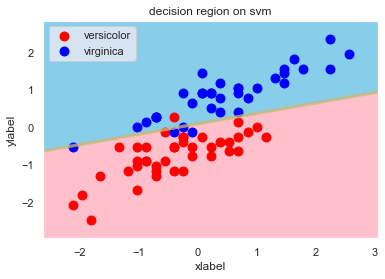

In [542]:
decision_region(x_train_std, y_train, svm, step=0.01, title='decision region on svm')

In [543]:
# 決定木

from sklearn import tree

tr = tree.DecisionTreeClassifier().fit(x_train_std, y_train)
tr_pred = tr.predict(x_test_std)

output(y_test, tr_pred, "TREE")

confusion matrix = 
 [[ 9  1]
 [ 4 11]]
accuracy =  0.8
precision =  0.6923076923076923
recall =  0.9
f1 score =  0.7826086956521738


{'KNN': [array([[10,  0],
         [ 1, 14]]), 0.96, 0.9090909090909091, 1.0, 0.9523809523809523],
 'LR': [array([[10,  0],
         [ 1, 14]]), 0.96, 0.9090909090909091, 1.0, 0.9523809523809523],
 'SVM': [array([[10,  0],
         [ 2, 13]]), 0.92, 0.8333333333333334, 1.0, 0.9090909090909091],
 'TREE': [array([[ 9,  1],
         [ 4, 11]]), 0.8, 0.6923076923076923, 0.9, 0.7826086956521738]}

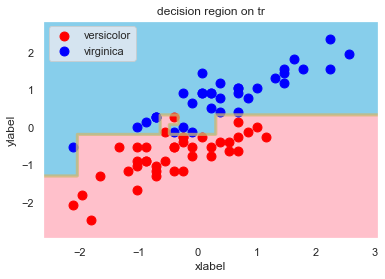

In [544]:
decision_region(x_train_std, y_train, tr, step=0.01, title='decision region on tr')

In [545]:
# ランダムフォレスト

from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier(n_estimators = 100).fit(x_train_std, y_train)
rand_pred = rand.predict(x_test_std)

d = output(y_test, rand_pred, "RandomForest")

tmp = pd.DataFrame(d.values(), index=d.keys(), columns= ["cm", "ac", "pr", "rc", "f1"])

confusion matrix = 
 [[ 9  1]
 [ 1 14]]
accuracy =  0.92
precision =  0.9
recall =  0.9
f1 score =  0.9


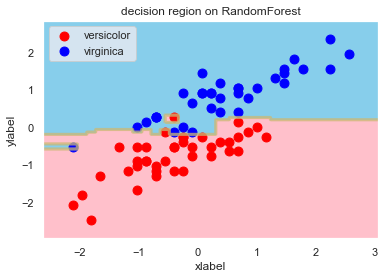

In [546]:
decision_region(x_train_std, y_train, rand, step=0.01, title='decision region on RandomForest')

In [547]:
# それぞれの結果をまとめた表
print(tmp)

                              cm    ac        pr   rc        f1
KNN           [[10, 0], [1, 14]]  0.96  0.909091  1.0  0.952381
LR            [[10, 0], [1, 14]]  0.96  0.909091  1.0  0.952381
SVM           [[10, 0], [2, 13]]  0.92  0.833333  1.0  0.909091
TREE           [[9, 1], [4, 11]]  0.80  0.692308  0.9  0.782609
RandomForest   [[9, 1], [1, 14]]  0.92  0.900000  0.9  0.900000


## 考察

ランダムに分けてるので出力のたびに結果は違うが、概ね

・最近傍法

・ロジスティック回帰

・SVM

・ランダムフォレスト

・決定木

の順で正解率が高いように感じる。
ただし適合率や再現率はその限りではなく、それぞれ一長一短の分類法のように感じた。

例えば、SVMとランダムフォレストでは、適合率はランダムフォレストの方が良いが、再現率はSVMの方が良い。


### 決定領域について

それぞれどういった方法で領域を分けているかがかなりわかりやすく見える。

最近傍法　：　直近周囲n個のサンプルの多数決によって領域を決定する。そのため外れ値は判定できない。

ロジスティック回帰　：　二項分類法の一つで、線形分離可能な場合に有効。

SVM　：　サポートベクターマシン。いくつかのメソッドがあるが、LINERでは二項間の最大マージンをとる。

決定木　：　分類木。サンプルに対して分類木に応じた領域を与える。

ランダムフォレスト　：　決定木を複数用意して分類を行う。多項分類に対して有効。